In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

**Import Dataset**

In [2]:
maindf = pd.read_csv('data_stocks.csv')
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-07-31,196.059998,196.490005,195.259995,196.449997,195.412216,38824100,APPLE
1,2023-08-01,196.240005,196.729996,195.279999,195.610001,194.576645,35175100,APPLE
2,2023-08-02,195.039993,195.179993,191.850006,192.580002,191.562653,50389300,APPLE
3,2023-08-03,191.570007,192.369995,190.690002,191.169998,190.160126,61235200,APPLE
4,2023-08-04,185.520004,187.380005,181.919998,181.990005,181.028610,115799700,APPLE


In [3]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
748,2024-07-23,253.600006,255.759995,245.630005,246.380005,246.380005,111928200,TESLA
749,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,TESLA
750,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,TESLA
751,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94483000,TESLA
752,2024-07-29,224.998001,234.270004,224.869995,230.880005,230.880005,108649843,TESLA


In [4]:
# Convert 'Date' column to datetime
maindf['Date'] = pd.to_datetime(maindf['Date'])

# Set 'Date' column as the index
maindf.set_index('Date', inplace=True)

**Descriptive Statistics about the Data**

.describe() generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [5]:
# Summary Stats
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,188.789309,191.168818,186.477370,188.859761,187.901871,5.760664e+07
std,31.038003,32.167292,29.890652,31.011873,31.888343,4.773623e+07
min,136.630005,137.679993,135.869995,136.380005,132.318832,1.649000e+06
25%,169.940002,171.580002,168.380005,170.009995,169.659882,4.728500e+06
50%,183.169998,184.850006,181.350006,182.880005,182.152924,5.379050e+07
75%,196.240005,198.869995,194.830002,197.410004,197.050949,9.549860e+07
max,277.549988,278.980011,271.000000,276.040009,276.040009,2.464214e+08


**Information About the Data**

.info() method prints information about a DataFrame including the index dtype and columns, non-null values, and memory usage.

In [6]:
# General info
maindf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2023-07-31 to 2024-07-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          753 non-null    float64
 1   High          753 non-null    float64
 2   Low           753 non-null    float64
 3   Close         753 non-null    float64
 4   Adj Close     753 non-null    float64
 5   Volume        753 non-null    int64  
 6   company_name  753 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 47.1+ KB


In [7]:
#maindf['date'] = pd.to_datetime(maindf['date'])
#maindf.set_index('date', inplace=True)

**Closing Price**

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

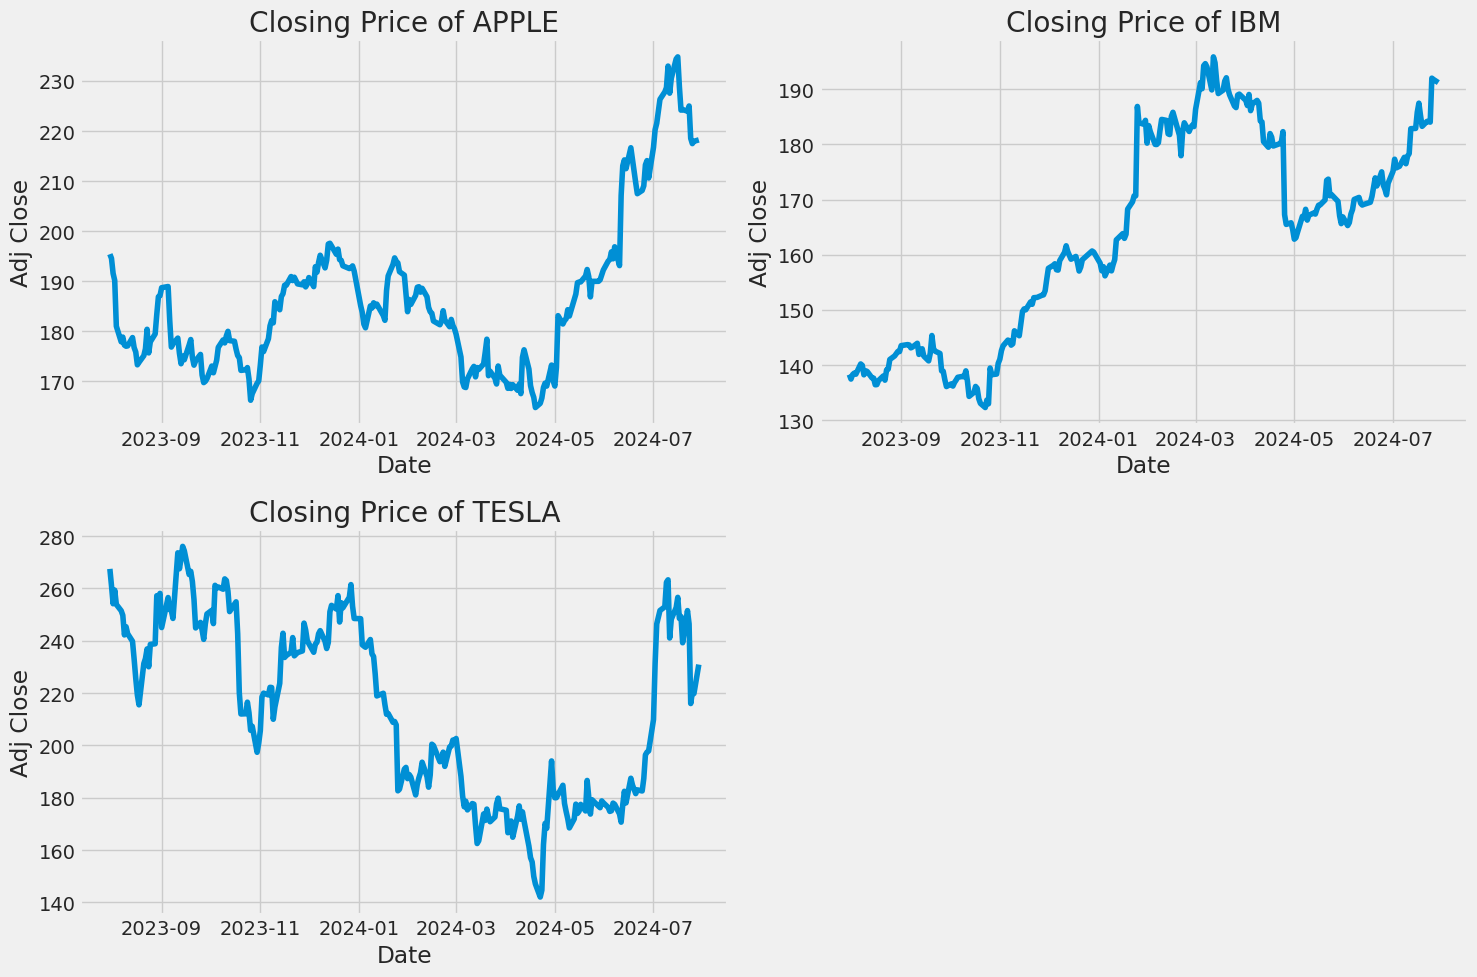

In [8]:
# Define the company names for plotting
company_names = ['APPLE', 'IBM', 'TESLA']

# Create a figure for the subplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through each company and plot the adjusted closing price
for i, company_name in enumerate(company_names, 1):
    plt.subplot(2, 2, i)
    
    # Filter the DataFrame for the current company
    company_df = maindf[maindf['company_name'] == company_name]
    
    # Plot the adjusted closing price
    plt.plot(company_df.index, company_df['Adj Close'])
    plt.ylabel('Adj Close')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {company_name}")
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Volume of Sales**

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

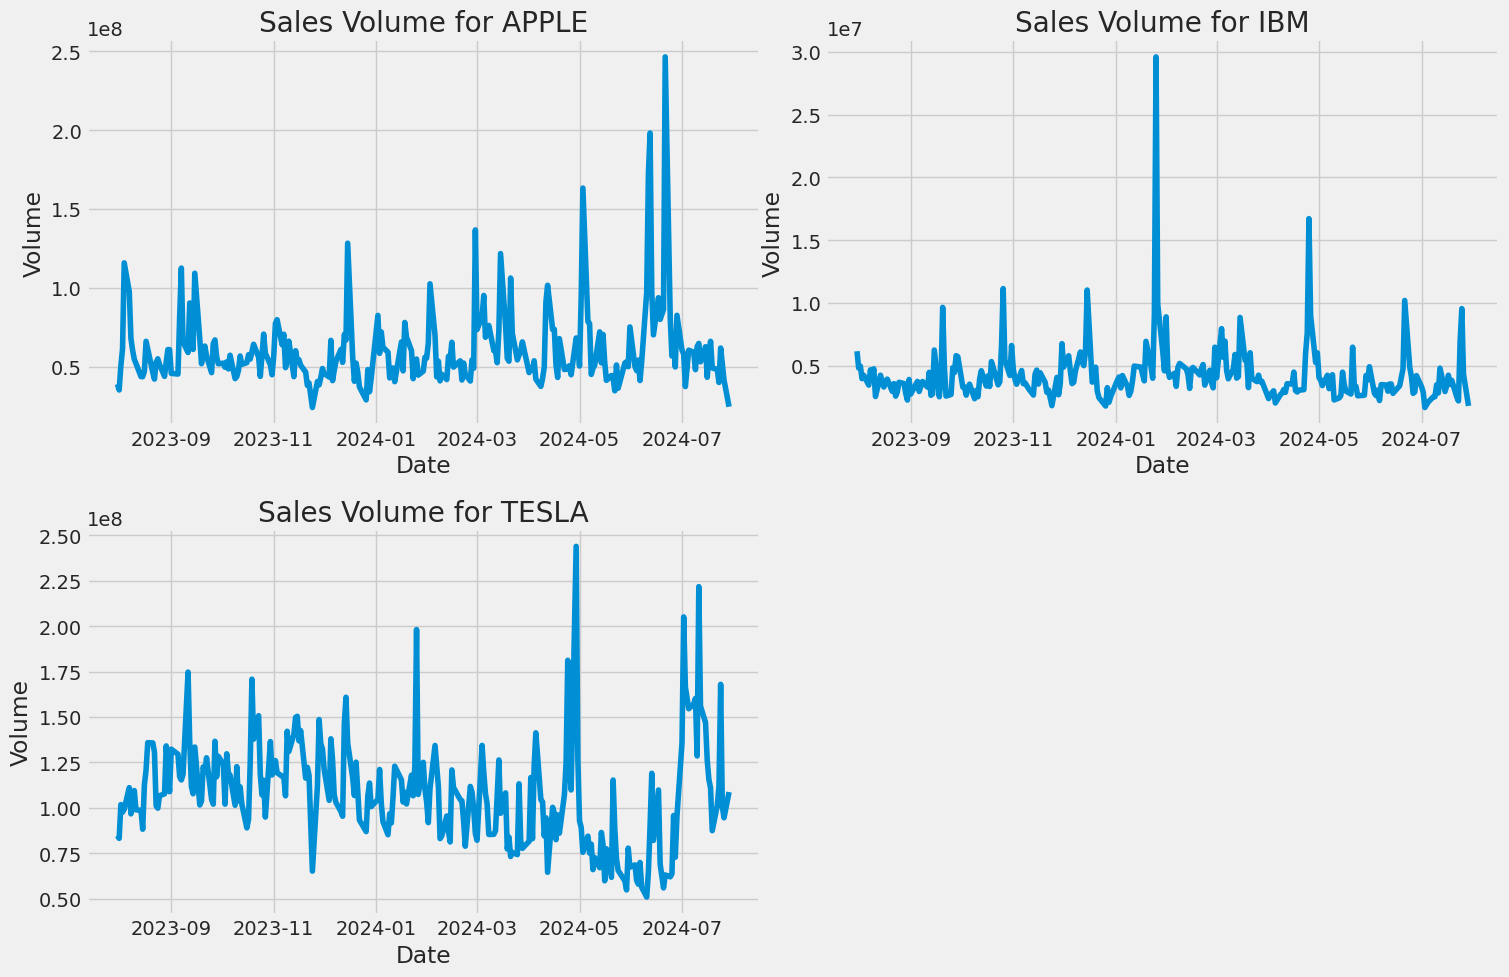

In [9]:
# Define the company names for plotting
company_names = ['APPLE', 'IBM', 'TESLA']

# Create a figure for the subplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Loop through each company and plot the volume
for i, company_name in enumerate(company_names, 1):
    plt.subplot(2, 2, i)
    
    # Filter the DataFrame for the current company
    company_df = maindf[maindf['company_name'] == company_name]
    
    # Plot the trading volume
    plt.plot(company_df.index, company_df['Volume'], label=f'Volume for {company_name}')
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {company_name}")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

*Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.*

**The moving average (MA)** is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

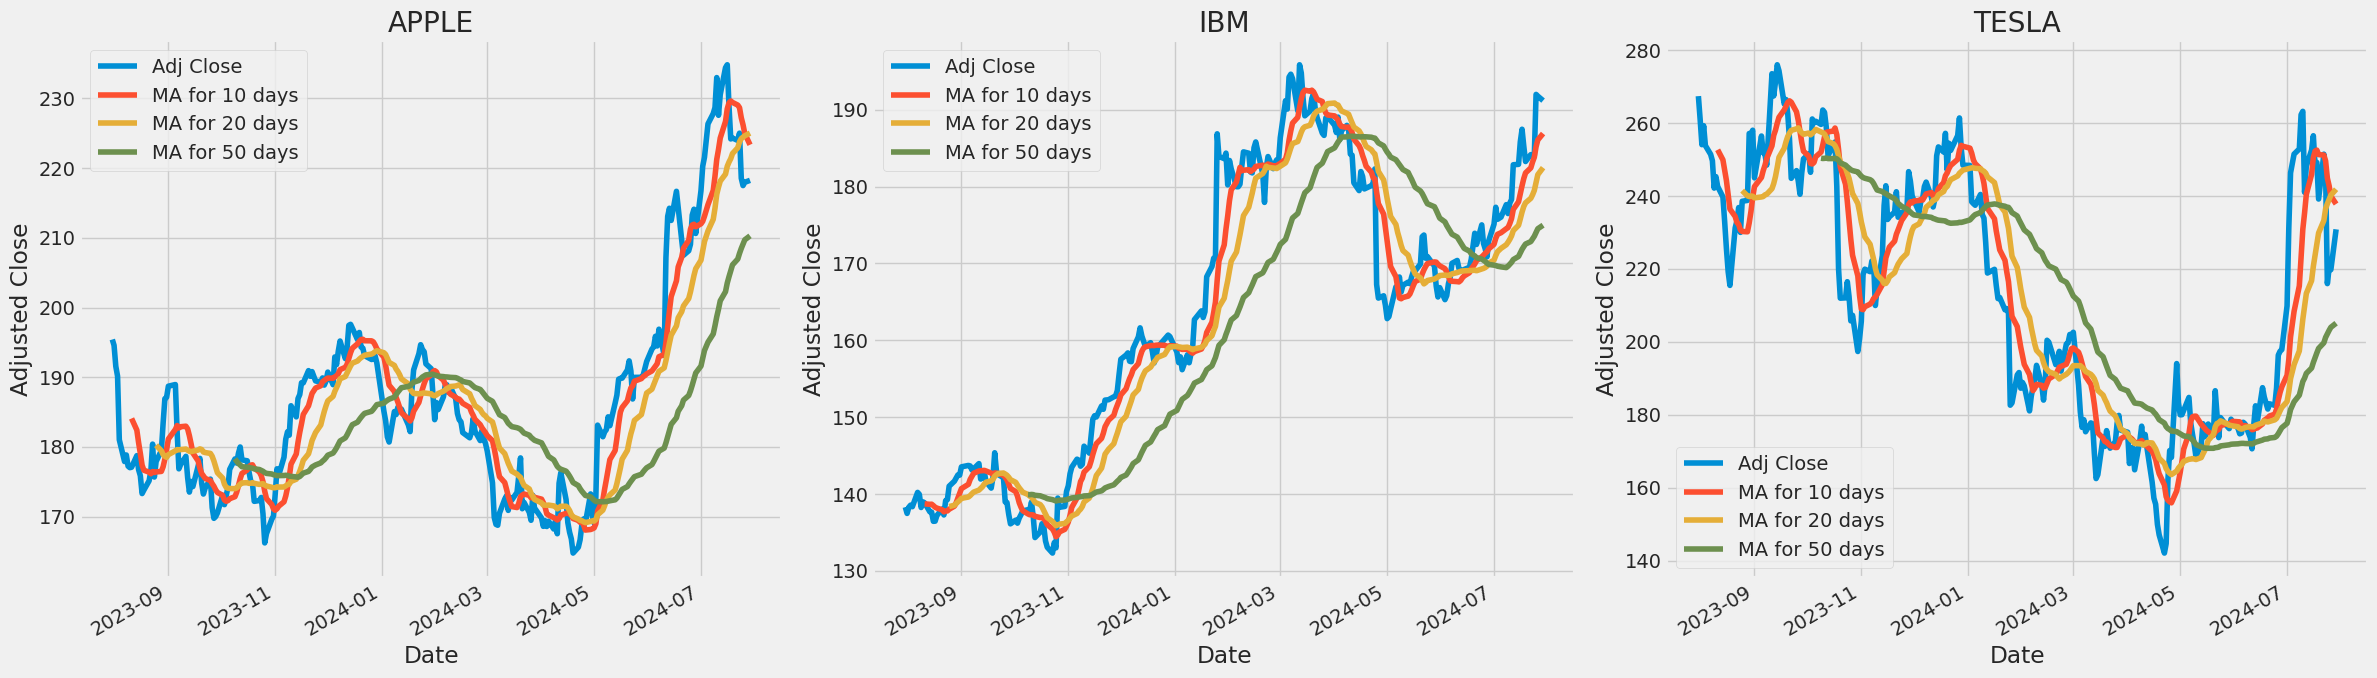

In [10]:
# List of moving average days
ma_days = [10, 20, 50]

# Define company names for plotting
company_names = ['APPLE', 'IBM', 'TESLA']

# Calculate moving averages and add columns to maindf
for ma in ma_days:
    maindf[f"MA for {ma} days"] = maindf.groupby('company_name')['Adj Close'].transform(lambda x: x.rolling(window=ma).mean())

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(7)
fig.set_figwidth(24)

# Plot for each company
for ax, company_name in zip(axes.flat, company_names):
    company_df = maindf[maindf['company_name'] == company_name]
    company_df[['Adj Close'] + [f"MA for {ma} days" for ma in ma_days]].plot(ax=ax)
    ax.set_title(company_name)
    ax.set_ylabel('Adjusted Close')
    ax.set_xlabel('Date')

# Adjust layout and show the plot
fig.tight_layout()
plt.show()

*We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.*

**What was the daily return of the stock on average?**

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

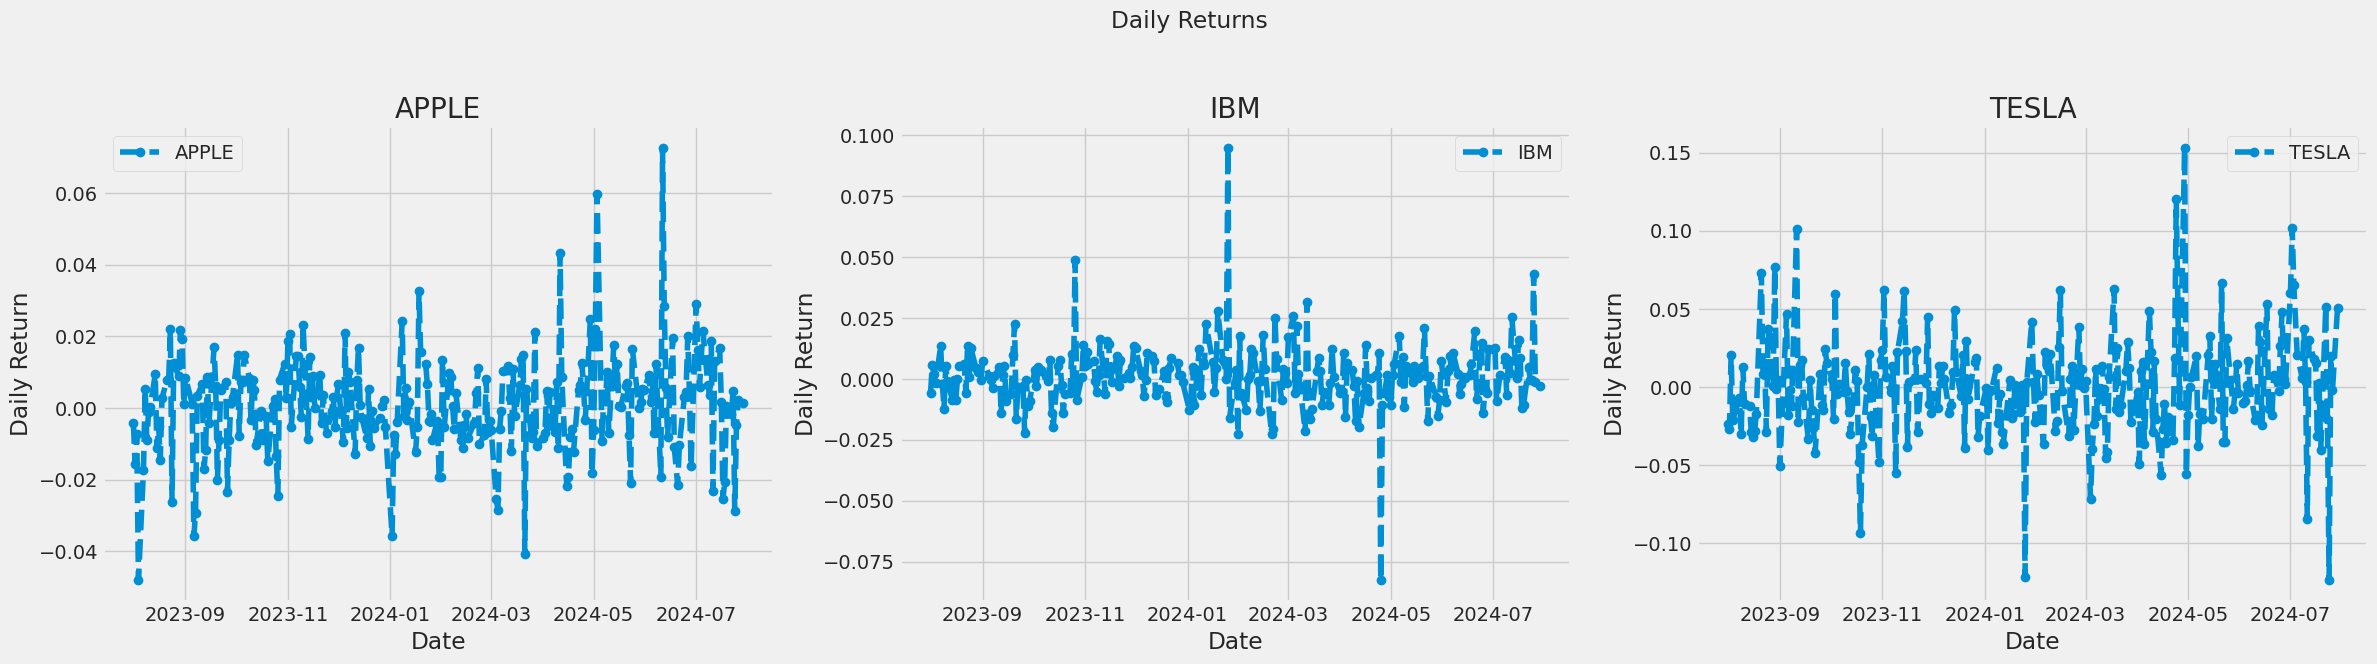

In [11]:
# Calculate daily returns for each company
for company_name in company_names:
    maindf.loc[maindf['company_name'] == company_name, 'Daily Return'] = maindf[maindf['company_name'] == company_name]['Adj Close'].pct_change()

# Create a figure for the subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 7))
fig.suptitle('Daily Returns')

# Plot daily returns for each company
for ax, company_name in zip(axes, company_names):
    company_df = maindf[maindf['company_name'] == company_name]
    ax.plot(company_df.index, company_df['Daily Return'], linestyle='--', marker='o', label=company_name)
    ax.set_title(company_name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return')
    ax.legend()

# Adjust layout and show the plot
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make room for the suptitle
plt.show()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

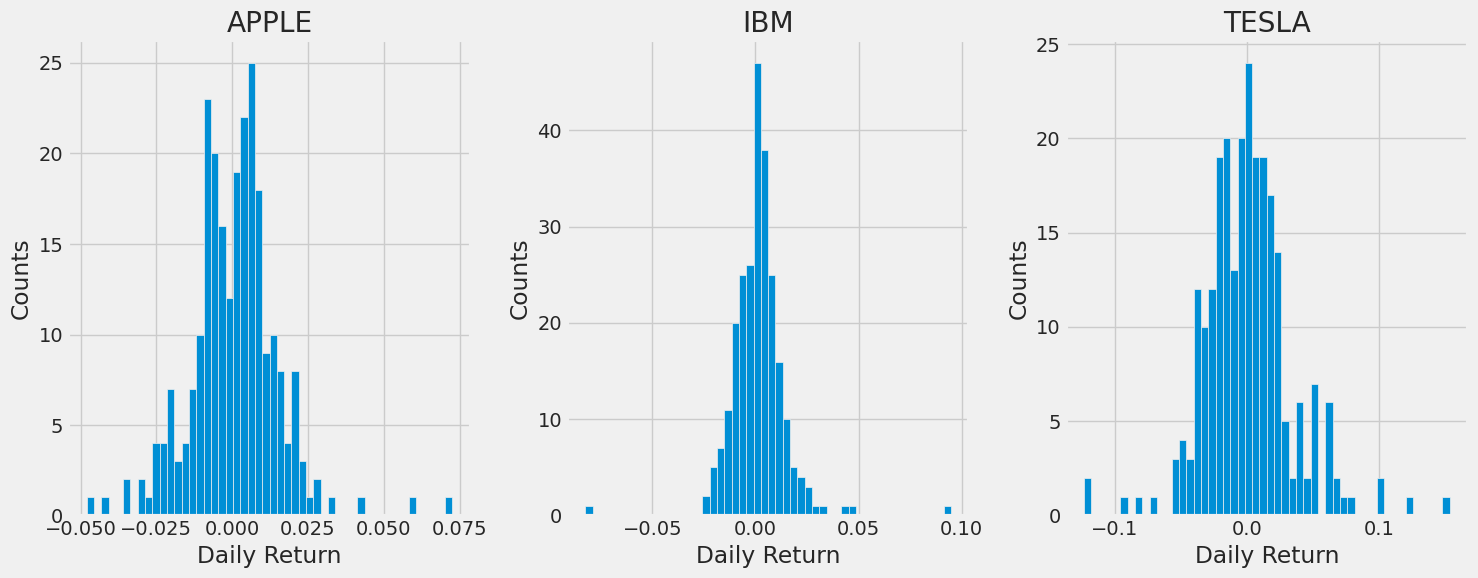

In [12]:
# Calculate daily returns for each company
for company_name in company_names:
    maindf.loc[maindf['company_name'] == company_name, 'Daily Return'] = maindf[maindf['company_name'] == company_name]['Adj Close'].pct_change()

# Create a figure for the histograms
plt.figure(figsize=(15, 6))

# Plot the daily return histogram for each company
for i, company_name in enumerate(company_names, 1):
    plt.subplot(1, 3, i)
    company_df = maindf[maindf['company_name'] == company_name]
    company_df['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name}')

plt.tight_layout()
plt.show()

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes

In [13]:
# Filter the DataFrame for the closing prices of the specific stocks
closing_prices = maindf[maindf['company_name'].isin(['APPLE', 'IBM', 'TESLA'])]
closing_df = closing_prices.pivot_table(index='Date', columns='company_name', values='Adj Close')
closing_df.index = pd.to_datetime(closing_df.index)

tech_rets = closing_df.pct_change()
print(tech_rets.head())

company_name     APPLE       IBM     TESLA
Date                                      
2023-07-31         NaN       NaN       NaN
2023-08-01   -0.004276 -0.005895 -0.023782
2023-08-02   -0.015490  0.005861 -0.026660
2023-08-03   -0.007322  0.001942  0.020503
2023-08-04   -0.048020 -0.001454 -0.021055


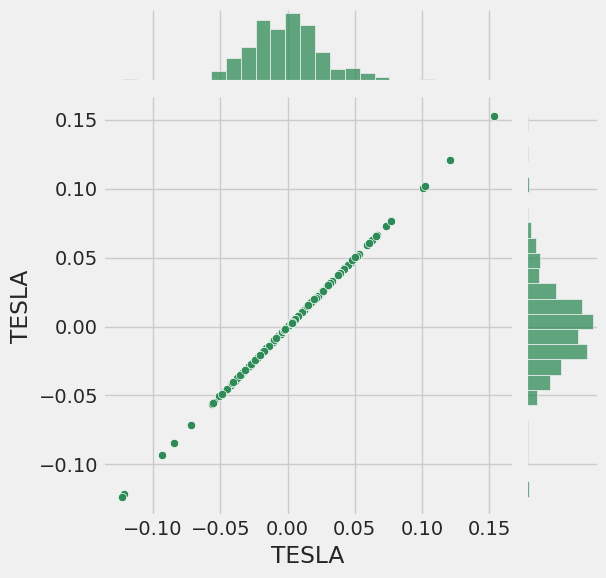

In [14]:
# Plotting TESLA returns compared to itself
sns.jointplot(x='TESLA', y='TESLA', data=tech_rets, kind='scatter', color='seagreen')

# Display the plot
plt.show()

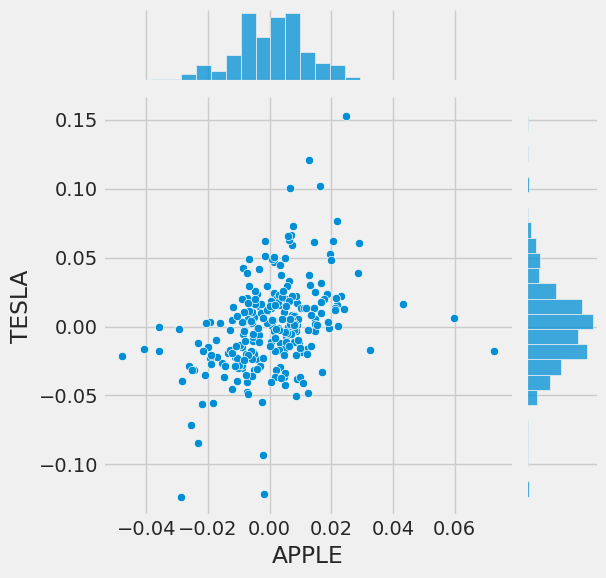

In [15]:
# We'll use joinplot to compare the daily returns of Tesla and Apple
sns.jointplot(x='APPLE', y='TESLA', data=tech_rets, kind='scatter')

plt.show()

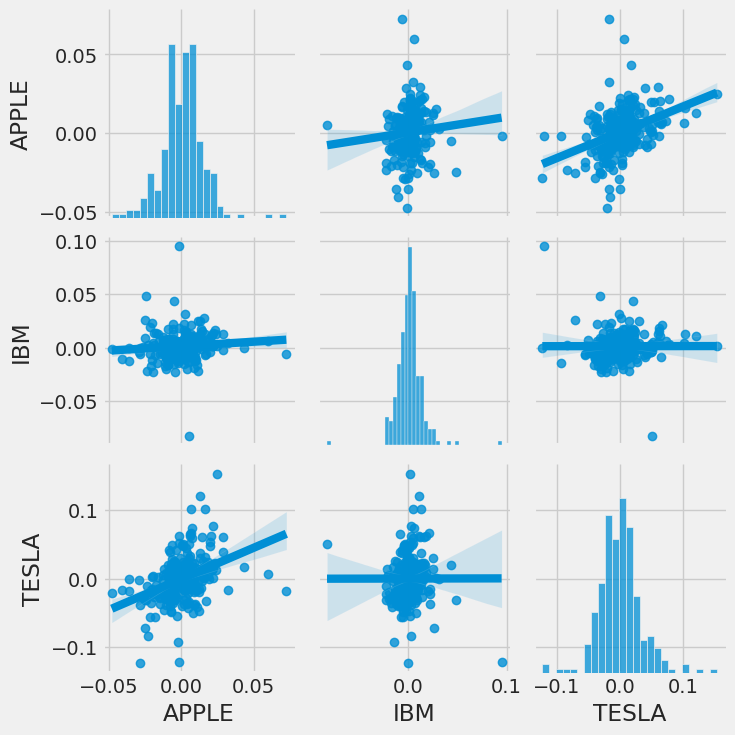

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between TESLA and APPLE daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

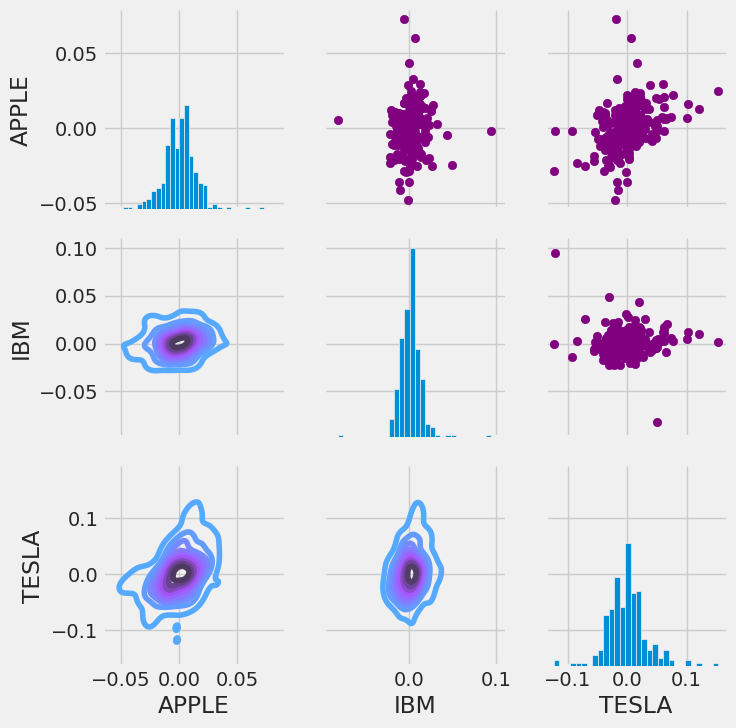

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

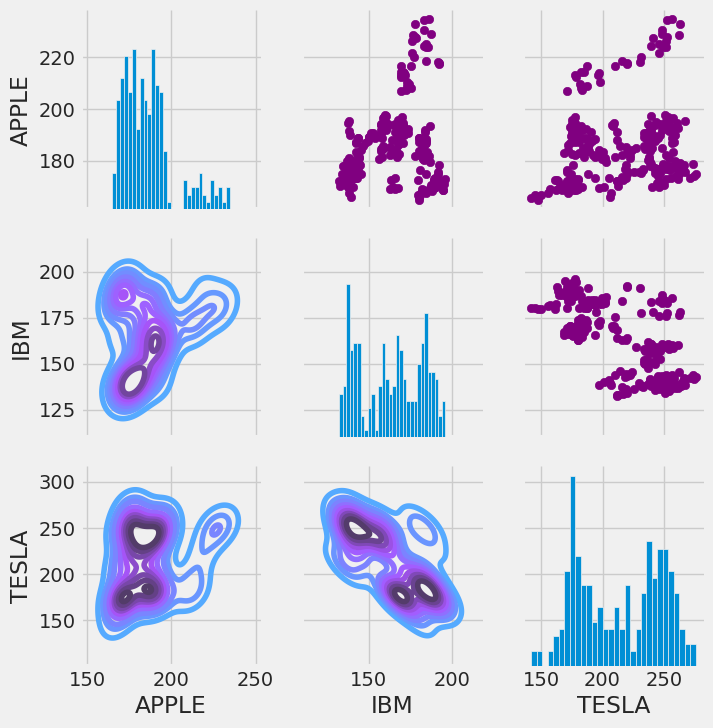

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Apple and Tesla.

Text(0.5, 1.0, 'Correlation of stock closing price')

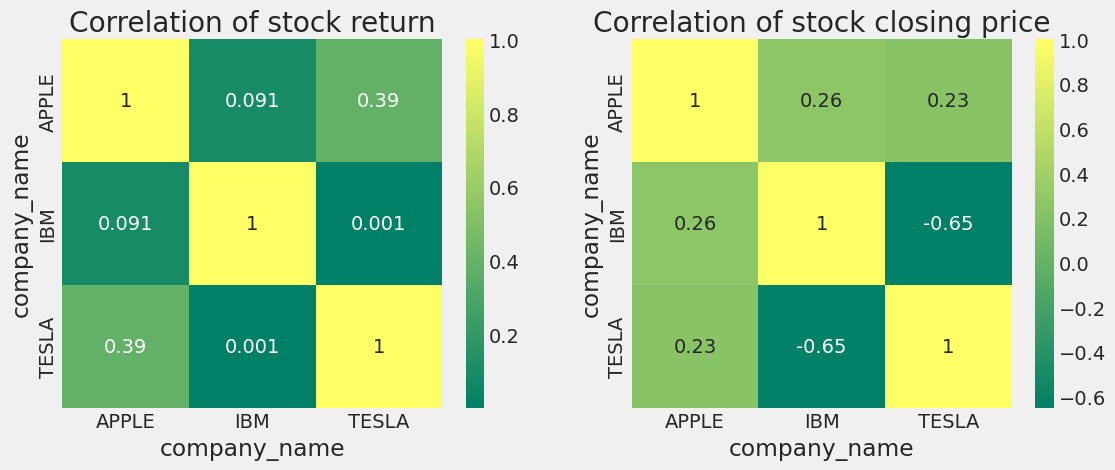

In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that APPLE and IBM had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

**How much value do we put at risk by investing in a particular stock?**

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

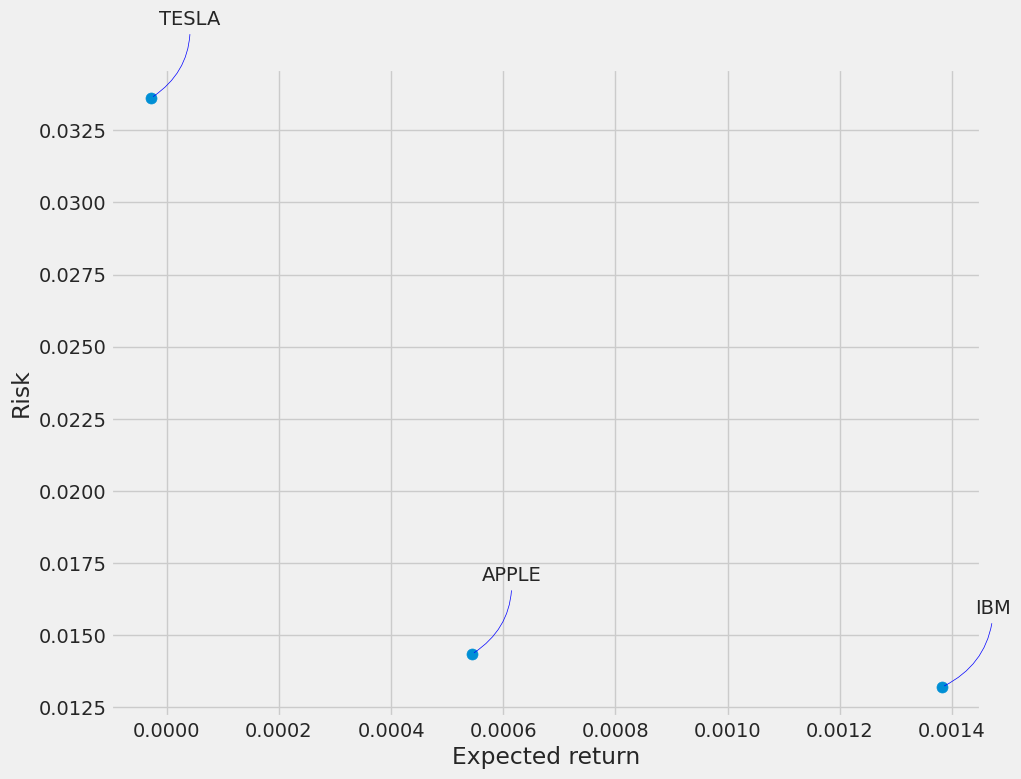

In [20]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

**Predicting the closing price stock price:**

In [21]:
# Filter the DataFrame for 'APPLE' only
apple_df = maindf[maindf['company_name'] == 'APPLE']

# Ensure the index is a datetime index if it's not already
if not pd.api.types.is_datetime64_any_dtype(apple_df.index):
    apple_df.index = pd.to_datetime(apple_df.index)

# Define the columns to drop
columns_to_drop = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']

# Drop the specified columns
apple_df = apple_df.drop(columns=columns_to_drop)

# Display the DataFrame
print(apple_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-31  196.059998  196.490005  195.259995  196.449997  195.412216   
2023-08-01  196.240005  196.729996  195.279999  195.610001  194.576645   
2023-08-02  195.039993  195.179993  191.850006  192.580002  191.562653   
2023-08-03  191.570007  192.369995  190.690002  191.169998  190.160126   
2023-08-04  185.520004  187.380005  181.919998  181.990005  181.028610   
...                ...         ...         ...         ...         ...   
2024-07-23  224.369995  226.940002  222.679993  225.009995  225.009995   
2024-07-24  224.000000  224.800003  217.130005  218.539993  218.539993   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.490005   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.960007   
2024-07-29  217.001999  219.300003  215.759995  218.240005  218.240005   

               Volume company_name  


In [22]:
# Filter the DataFrame for 'APPLE' only
ibm_df = maindf[maindf['company_name'] == 'IBM']

# Ensure the index is a datetime index if it's not already
if not pd.api.types.is_datetime64_any_dtype(ibm_df.index):
    apple_df.index = pd.to_datetime(ibm_df.index)

# Define the columns to drop
columns_to_drop1 = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']

# Drop the specified columns
ibm_df = ibm_df.drop(columns=columns_to_drop1)

# Display the DataFrame
print(ibm_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-31  143.809998  144.600006  143.529999  144.179993  138.295074   
2023-08-01  144.250000  144.479996  142.169998  143.330002  137.479767   
2023-08-02  142.779999  144.300003  142.309998  144.169998  138.285492   
2023-08-03  143.779999  145.220001  143.309998  144.449997  138.554062   
2023-08-04  145.089996  146.089996  143.990005  144.240005  138.352631   
...                ...         ...         ...         ...         ...   
2024-07-23  184.360001  185.380005  183.009995  184.100006  184.100006   
2024-07-24  184.139999  185.070007  183.149994  184.020004  184.020004   
2024-07-25  186.800003  196.259995  185.300003  191.979996  191.979996   
2024-07-26  190.509995  193.570007  189.619995  191.750000  191.750000   
2024-07-29  193.179993  193.289993  189.179993  191.169998  191.169998   

             Volume company_name  
Da

In [23]:
# Filter the DataFrame for 'APPLE' only
tsla_df = maindf[maindf['company_name'] == 'TESLA']

# Ensure the index is a datetime index if it's not already
if not pd.api.types.is_datetime64_any_dtype(tsla_df.index):
    tsla_df.index = pd.to_datetime(tsla_df.index)

# Define the columns to drop
columns_to_drop2 = ['MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'Daily Return']

# Drop the specified columns
tsla_df = tsla_df.drop(columns=columns_to_drop2)

# Display the DataFrame
print(tsla_df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-07-31  267.480011  269.079987  263.779999  267.429993  267.429993   
2023-08-01  266.260010  266.470001  260.250000  261.070007  261.070007   
2023-08-02  255.570007  259.519989  250.490005  254.110001  254.110001   
2023-08-03  252.039993  260.489990  252.000000  259.320007  259.320007   
2023-08-04  260.970001  264.769989  253.110001  253.860001  253.860001   
...                ...         ...         ...         ...         ...   
2024-07-23  253.600006  255.759995  245.630005  246.380005  246.380005   
2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
2024-07-29  224.998001  234.270004  224.869995  230.880005  230.880005   

               Volume company_name  


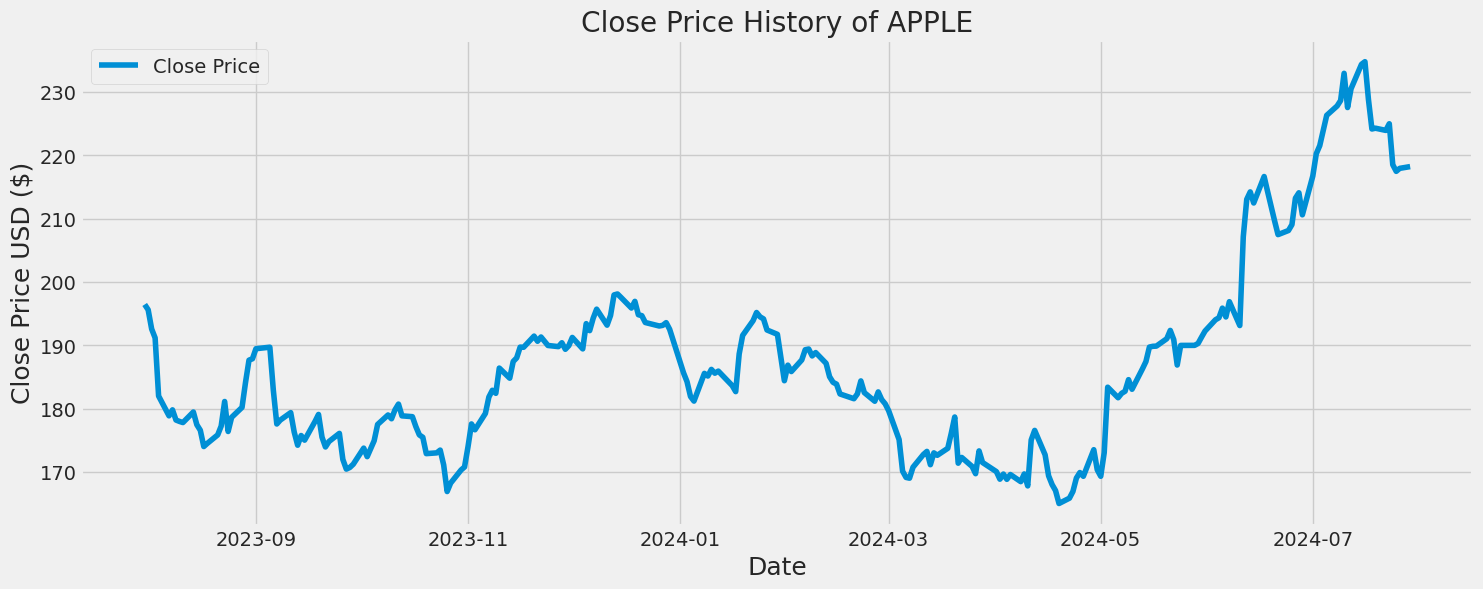

In [24]:
# Plot the Close Price History
plt.figure(figsize=(16, 6))
plt.title('Close Price History of APPLE')
plt.plot(apple_df.index, apple_df['Close'], label='Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

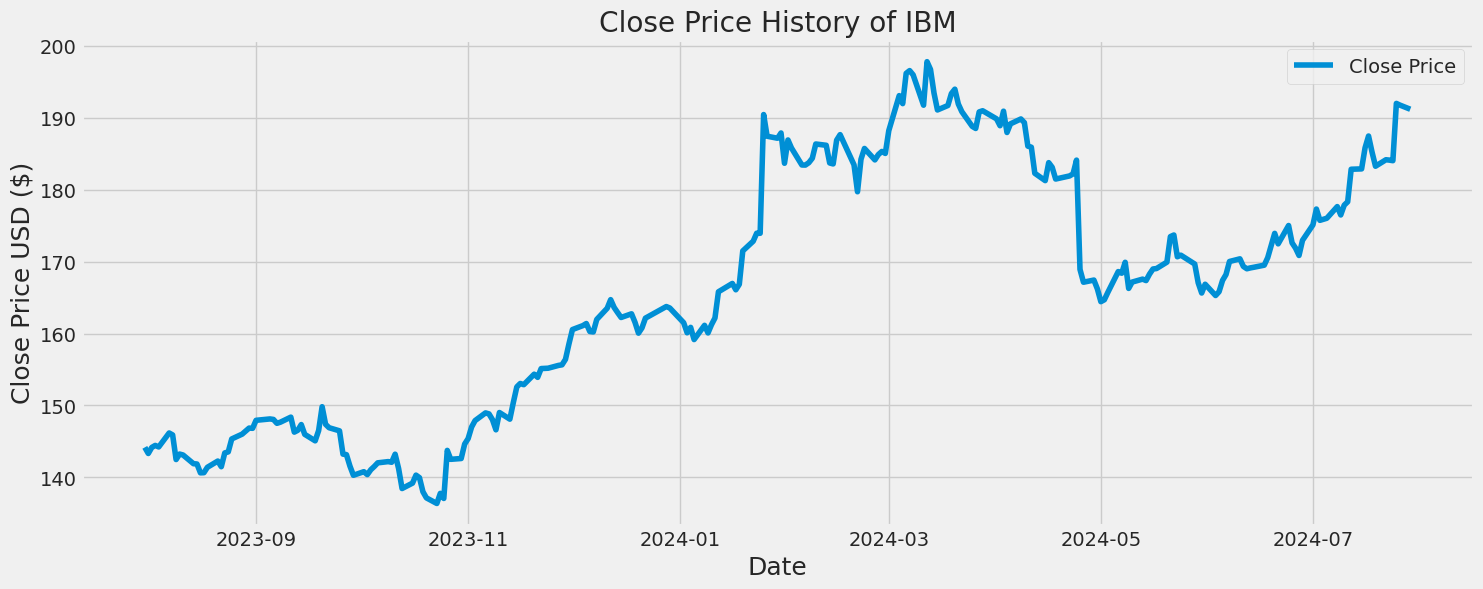

In [25]:
# Plot the Close Price History
plt.figure(figsize=(16, 6))
plt.title('Close Price History of IBM')
plt.plot(ibm_df.index, ibm_df['Close'], label='Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

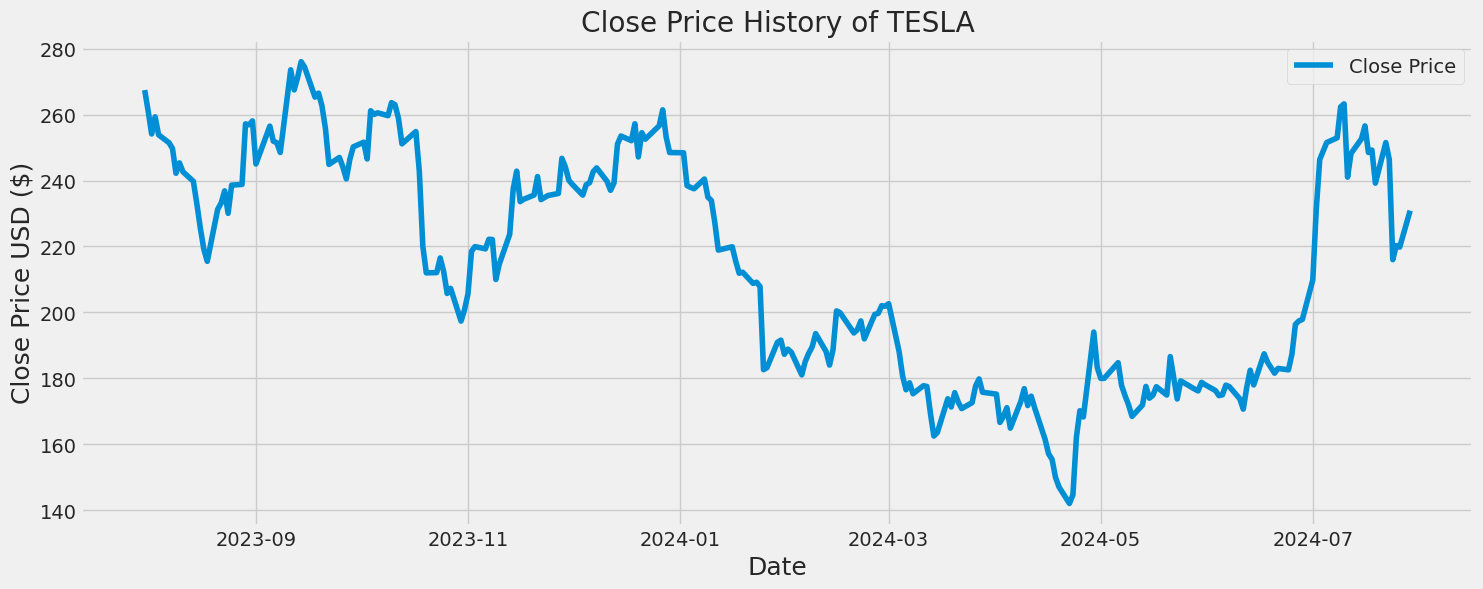

In [26]:
# Plot the Close Price History
plt.figure(figsize=(16, 6))
plt.title('Close Price History of TESLA')
plt.plot(tsla_df.index, tsla_df['Close'], label='Close Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
close_APPLE = apple_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = close_APPLE.values
# Get the number of rows to train the model on
training_dataAPL_len = int(np.ceil( len(dataset) * .95 ))

training_dataAPL_len

239

In [28]:
# Create a new dataframe with only the 'Close column 
close_IBM = ibm_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset1 = close_IBM.values
# Get the number of rows to train the model on
training_dataIBM_len = int(np.ceil( len(dataset1) * .95 ))

training_dataIBM_len

239

In [29]:
# Create a new dataframe with only the 'Close column 
close_TESLA = tsla_df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset2 = close_TESLA.values
# Get the number of rows to train the model on
training_dataTSLA_len = int(np.ceil( len(dataset2) * .95 ))

training_dataTSLA_len

239

In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataAPL = scaler.fit_transform(dataset)

scaled_dataAPL

array([[0.45044391],
       [0.43841302],
       [0.39501574],
       [0.3748209 ],
       [0.24334007],
       [0.1983673 ],
       [0.21197367],
       [0.18891437],
       [0.18576339],
       [0.18318522],
       [0.20710406],
       [0.17831561],
       [0.16571192],
       [0.12890288],
       [0.135921  ],
       [0.1552563 ],
       [0.17516463],
       [0.23087931],
       [0.1629906 ],
       [0.19492981],
       [0.21755945],
       [0.27384694],
       [0.32440549],
       [0.32755647],
       [0.35032948],
       [0.35376675],
       [0.25651678],
       [0.17989109],
       [0.188771  ],
       [0.20567171],
       [0.16184477],
       [0.13191071],
       [0.15382418],
       [0.14336857],
       [0.18576339],
       [0.20151827],
       [0.15024355],
       [0.1279002 ],
       [0.14021759],
       [0.15869379],
       [0.09968499],
       [0.0777713 ],
       [0.0814953 ],
       [0.08894308],
       [0.12532224],
       [0.10598672],
       [0.12403327],
       [0.141

In [31]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataIBM = scaler.fit_transform(dataset1)

scaled_dataIBM

array([[0.12703564],
       [0.11319214],
       [0.12687287],
       [0.13143311],
       [0.12801305],
       [0.15960894],
       [0.15521172],
       [0.09951142],
       [0.11188918],
       [0.10977184],
       [0.09006514],
       [0.08941353],
       [0.06938102],
       [0.06970683],
       [0.08192181],
       [0.09609112],
       [0.08322477],
       [0.11449511],
       [0.11677523],
       [0.14609124],
       [0.15700326],
       [0.1640064 ],
       [0.17068399],
       [0.17019541],
       [0.18827359],
       [0.1913681 ],
       [0.19022791],
       [0.18143323],
       [0.18403891],
       [0.19543976],
       [0.1615635 ],
       [0.16563517],
       [0.17866453],
       [0.15651468],
       [0.14185655],
       [0.16514659],
       [0.21905535],
       [0.17915311],
       [0.17149837],
       [0.16449498],
       [0.11172641],
       [0.11058622],
       [0.08469051],
       [0.06384362],
       [0.07198695],
       [0.06530936],
       [0.07638441],
       [0.083

In [32]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataTSL = scaler.fit_transform(dataset2)

scaled_dataTSL

array([[0.93574136],
       [0.88827524],
       [0.83633102],
       [0.87521456],
       [0.83446521],
       [0.81647876],
       [0.80341809],
       [0.74736917],
       [0.77087834],
       [0.7508022 ],
       [0.72923343],
       [0.67848347],
       [0.62355399],
       [0.57593847],
       [0.5481006 ],
       [0.66594516],
       [0.68019998],
       [0.70759007],
       [0.6566907 ],
       [0.72050145],
       [0.72221808],
       [0.85924311],
       [0.85715342],
       [0.86595999],
       [0.76841546],
       [0.85409346],
       [0.8199865 ],
       [0.81677736],
       [0.79446222],
       [0.98164026],
       [0.93611466],
       [0.96462407],
       [1.        ],
       [0.98768569],
       [0.91969543],
       [0.9288006 ],
       [0.89961929],
       [0.84819755],
       [0.76744531],
       [0.78319276],
       [0.76177318],
       [0.73475627],
       [0.77864018],
       [0.80729901],
       [0.81759832],
       [0.77975962],
       [0.8889469 ],
       [0.880

In [62]:
# Create the scaled training data set
train_dataAPL = scaled_dataAPL[0:int(training_dataAPL_len), :]
# Split the data into x_train and y_train data sets
x_trainA = []
y_trainA = []

for i in range(60, len(train_dataAPL)):
    x_trainA.append(train_dataAPL[i-60:i, 0])
    y_trainA.append(train_dataAPL[i, 0])
    if i<= 61:
        print(x_trainA)
        print(y_trainA)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_trainA, y_trainA = np.array(x_trainA), np.array(y_trainA)

# Reshape the data
x_trainA = np.reshape(x_trainA, (x_trainA.shape[0], x_trainA.shape[1], 1))
# x_train.shape

[array([0.45044391, 0.43841302, 0.39501574, 0.3748209 , 0.24334007,
       0.1983673 , 0.21197367, 0.18891437, 0.18576339, 0.18318522,
       0.20710406, 0.17831561, 0.16571192, 0.12890288, 0.135921  ,
       0.1552563 , 0.17516463, 0.23087931, 0.1629906 , 0.19492981,
       0.21755945, 0.27384694, 0.32440549, 0.32755647, 0.35032948,
       0.35376675, 0.25651678, 0.17989109, 0.188771  , 0.20567171,
       0.16184477, 0.13191071, 0.15382418, 0.14336857, 0.18576339,
       0.20151827, 0.15024355, 0.1279002 , 0.14021759, 0.15869379,
       0.09968499, 0.0777713 , 0.0814953 , 0.08894308, 0.12532224,
       0.10598672, 0.12403327, 0.14193645, 0.17888863, 0.20037244,
       0.19177883, 0.21197367, 0.22500723, 0.1983673 , 0.1965053 ,
       0.1740188 , 0.1552563 , 0.14981389, 0.1128617 , 0.11458034])]
[0.12088229097734038]

[array([0.45044391, 0.43841302, 0.39501574, 0.3748209 , 0.24334007,
       0.1983673 , 0.21197367, 0.18891437, 0.18576339, 0.18318522,
       0.20710406, 0.17831561, 0.16

In [63]:
# Create the training data set 
# Create the scaled training data set
train_dataIBM = scaled_dataIBM[0:int(training_dataIBM_len), :]
# Split the data into x_train and y_train data sets
x_trainB = []
y_trainB = []

for i in range(60, len(train_dataIBM)):
    x_trainB.append(train_dataIBM[i-60:i, 0])
    y_trainB.append(train_dataIBM[i, 0])
    if i<= 61:
        print(x_trainB)
        print(y_trainB)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_trainB, y_trainB = np.array(x_trainB), np.array(y_trainB)

# Reshape the data
x_trainB = np.reshape(x_trainB, (x_trainB.shape[0], x_trainB.shape[1], 1))
# x_train.shape

[array([0.12703564, 0.11319214, 0.12687287, 0.13143311, 0.12801305,
       0.15960894, 0.15521172, 0.09951142, 0.11188918, 0.10977184,
       0.09006514, 0.08941353, 0.06938102, 0.06970683, 0.08192181,
       0.09609112, 0.08322477, 0.11449511, 0.11677523, 0.14609124,
       0.15700326, 0.1640064 , 0.17068399, 0.17019541, 0.18827359,
       0.1913681 , 0.19022791, 0.18143323, 0.18403891, 0.19543976,
       0.1615635 , 0.16563517, 0.17866453, 0.15651468, 0.14185655,
       0.16514659, 0.21905535, 0.17915311, 0.17149837, 0.16449498,
       0.11172641, 0.11058622, 0.08469051, 0.06384362, 0.07198695,
       0.06530936, 0.07638441, 0.08371335, 0.09201945, 0.09478815,
       0.09332242, 0.11156338, 0.07915311, 0.03387625, 0.04609124,
       0.06416943, 0.058469  , 0.02654706, 0.01270356, 0.        ])]
[0.02296398279285583]

[array([0.12703564, 0.11319214, 0.12687287, 0.13143311, 0.12801305,
       0.15960894, 0.15521172, 0.09951142, 0.11188918, 0.10977184,
       0.09006514, 0.08941353, 0.06

In [64]:
# Create the training data set 
# Create the scaled training data set
train_dataTSLA = scaled_dataTSL[0:int(training_dataTSLA_len), :]
# Split the data into x_train and y_train data sets
x_trainC = []
y_trainC = []

for i in range(60, len(train_dataTSLA)):
    x_trainC.append(train_dataTSLA[i-60:i, 0])
    y_trainC.append(train_dataTSLA[i, 0])
    if i<= 61:
        print(x_trainC)
        print(y_trainC)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_trainC, y_trainC = np.array(x_trainC), np.array(y_trainC)

# Reshape the data
x_trainC = np.reshape(x_trainC, (x_trainC.shape[0], x_trainC.shape[1], 1))
# x_train.shape

[array([0.93574136, 0.88827524, 0.83633102, 0.87521456, 0.83446521,
       0.81647876, 0.80341809, 0.74736917, 0.77087834, 0.7508022 ,
       0.72923343, 0.67848347, 0.62355399, 0.57593847, 0.5481006 ,
       0.66594516, 0.68019998, 0.70759007, 0.6566907 , 0.72050145,
       0.72221808, 0.85924311, 0.85715342, 0.86595999, 0.76841546,
       0.85409346, 0.8199865 , 0.81677736, 0.79446222, 0.98164026,
       0.93611466, 0.96462407, 1.        , 0.98768569, 0.91969543,
       0.9288006 , 0.89961929, 0.84819755, 0.76744531, 0.78319276,
       0.76177318, 0.73475627, 0.77864018, 0.80729901, 0.81759832,
       0.77975962, 0.8889469 , 0.88066259, 0.88424502, 0.87782674,
       0.90730642, 0.90260454, 0.87185601, 0.81401588, 0.83491298,
       0.84185386, 0.75102609, 0.58258075, 0.52197925, 0.52265091])]
[0.5557877316790052]

[array([0.93574136, 0.88827524, 0.83633102, 0.87521456, 0.83446521,
       0.81647876, 0.80341809, 0.74736917, 0.77087834, 0.7508022 ,
       0.72923343, 0.67848347, 0.623

In [65]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_trainA.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_trainA, y_trainA, batch_size=32, epochs=50, validation_split=0.2)

/home/saiful/anaconda3/envs/earthquake_predict/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - loss: 0.0650 - val_loss: 0.0574
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0164 - val_loss: 0.0397
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0101 - val_loss: 0.0860
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0103 - val_loss: 0.0837
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0098 - val_loss: 0.0483
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0080 - val_loss: 0.0325
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0079 - val_loss: 0.0425
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0081 - val_loss: 0.0464
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0069 - val_loss: 0.0327
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0068 - val_loss: 0.0271
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0060 - val_loss: 0.0297
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0057 - val_los

In [66]:
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape= (x_trainB.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(25))
model1.add(Dense(1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_trainB, y_trainB, batch_size=32, epochs=50, validation_split=0.2)

/home/saiful/anaconda3/envs/earthquake_predict/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - loss: 0.3117 - val_loss: 0.0107
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0379 - val_loss: 0.0428
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0486 - val_loss: 0.0073
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 0.0299 - val_loss: 0.0165
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0299 - val_loss: 0.0042
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0131 - val_loss: 0.0046
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0177 - val_loss: 0.0066
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.0145 - val_loss: 0.0022
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0127 - val_loss: 0.0033
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0151 - val_loss: 0.0023
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0125 - val_loss: 0.0024
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0121 - val_lo

In [50]:
model2 = Sequential()
model2.add(LSTM(64, return_sequences=True, input_shape= (x_trainC.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(LSTM(50, return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(25))
model2.add(Dense(1))

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model2.fit(x_trainC, y_trainC, batch_size=32, epochs=50, validation_split=0.2)

/home/saiful/anaconda3/envs/earthquake_predict/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.2234 - val_loss: 0.0376
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0319 - val_loss: 0.0311
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 0.0212 - val_loss: 0.0485
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 0.0303 - val_loss: 0.0406
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0194 - val_loss: 0.0290
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0189 - val_loss: 0.0278
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0182 - val_loss: 0.0349
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0138 - val_loss: 0.0348
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0152 - val_loss: 0.0286
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0126 - val_loss: 0.0305
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0145 - val_loss: 0.0324
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 0.0128 - val_lo

In [74]:
# Create the testing data set
test_data = scaled_dataAPL[training_dataAPL_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_dataAPL_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model1.predict(x_test)  # Make sure you use the correct model instance
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f'RMSE APPLE: {rmse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
RMSE APPLE: 30022.281335862044


In [75]:
# Create the testing data set
test_data1 = scaled_dataIBM[training_dataIBM_len - 60:, :]

# Create the data sets x_test and y_test
x_test1 = []
y_test1 = dataset[training_dataIBM_len:, :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])

# Convert the data to a numpy array
x_test1 = np.array(x_test1)

# Reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

# Get the model's predicted price values
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)
y_test1 = scaler.inverse_transform(y_test1.reshape(-1, 1))

# Get the root mean squared error (RMSE)
rmse1 = np.sqrt(np.mean(((predictions1 - y_test1) ** 2)))
print(f'RMSE IBM: {rmse1}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
RMSE IBM: 30041.324344128527


In [76]:
# Create the testing data set
test_data2 = scaled_dataTSL[training_dataTSLA_len - 60:, :]

# Create the data sets x_test and y_test
x_test2 = []
y_test2 = dataset[training_dataTSLA_len:, :]
for i in range(60, len(test_data2)):
    x_test2.append(test_data2[i-60:i, 0])

# Convert the data to a numpy array
x_test2 = np.array(x_test2)

# Reshape the data
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))

# Get the model's predicted price values
predictions2 = model2.predict(x_test2)
predictions2 = scaler.inverse_transform(predictions2)
y_test2 = scaler.inverse_transform(y_test2.reshape(-1, 1))

# Get the root mean squared error (RMSE)
rmse2 = np.sqrt(np.mean(((predictions2 - y_test2) ** 2)))
print(f'RMSE TSLA: {rmse2}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
RMSE TSLA: 30041.14542325871


In [77]:
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

print(f'x_test shape: {x_test1.shape}')
print(f'y_test shape: {y_test1.shape}')

print(f'x_test shape: {x_test2.shape}')
print(f'y_test shape: {y_test2.shape}')

x_test shape: (12, 60, 1)
y_test shape: (12, 1)
x_test shape: (12, 60, 1)
y_test shape: (12, 1)
x_test shape: (12, 60, 1)
y_test shape: (12, 1)


/tmp/ipykernel_1863/3356562642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


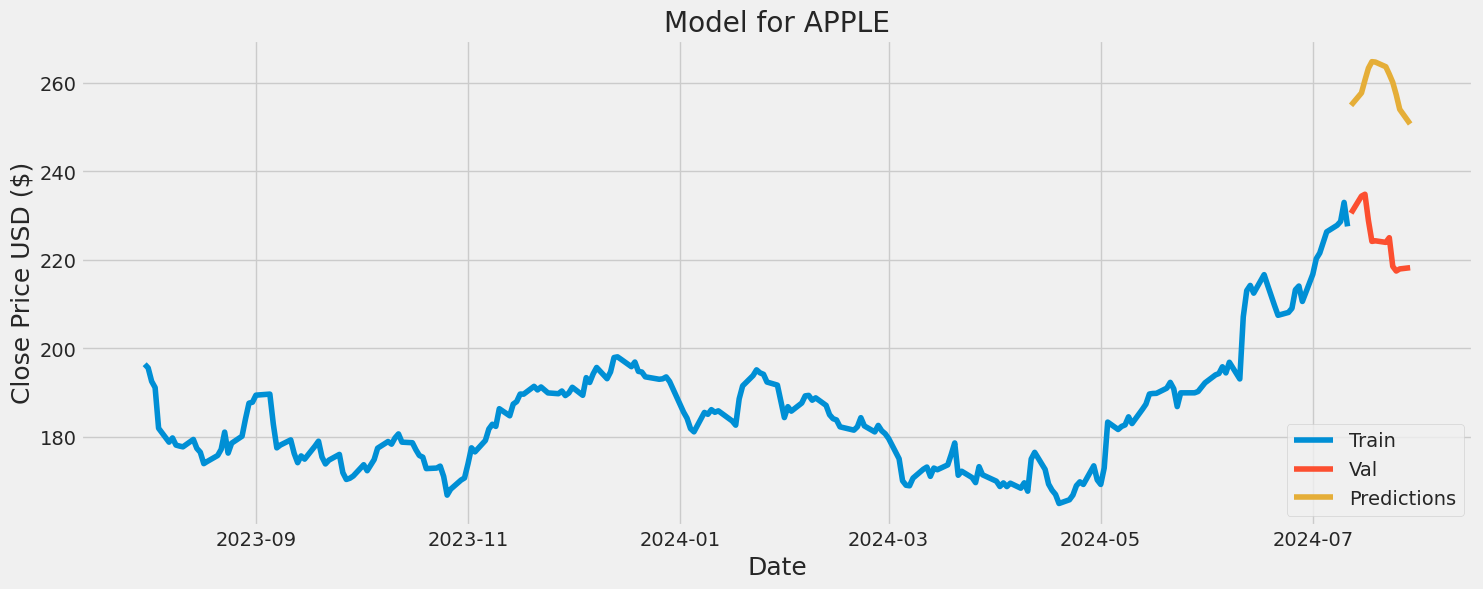

In [78]:
# Plot the data
train = close_APPLE[:training_dataAPL_len]
valid = close_APPLE[training_dataAPL_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model for APPLE')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/tmp/ipykernel_1863/2231993507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid1['Predictions'] = predictions1


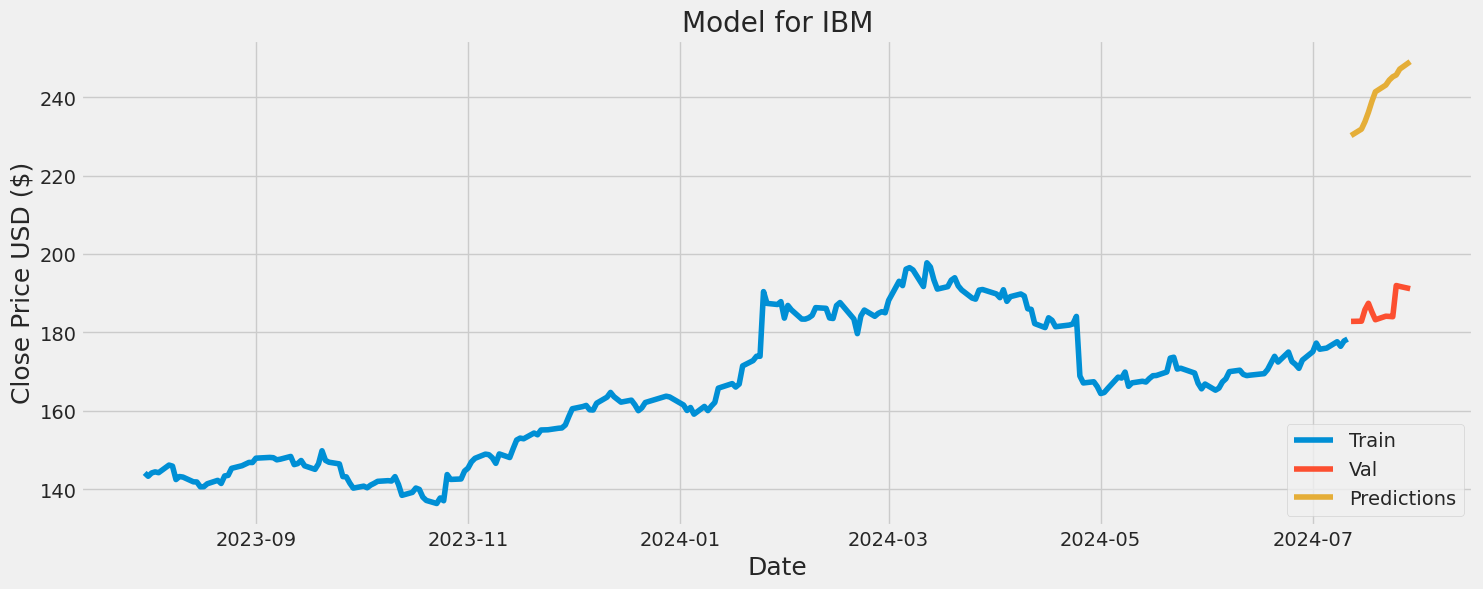

In [79]:
# Plot the data
train1 = close_IBM[:training_dataIBM_len]
valid1 = close_IBM[training_dataIBM_len:]
valid1['Predictions'] = predictions1

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model for IBM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train1['Close'])
plt.plot(valid1[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/tmp/ipykernel_1863/1659165245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid2['Predictions'] = predictions2


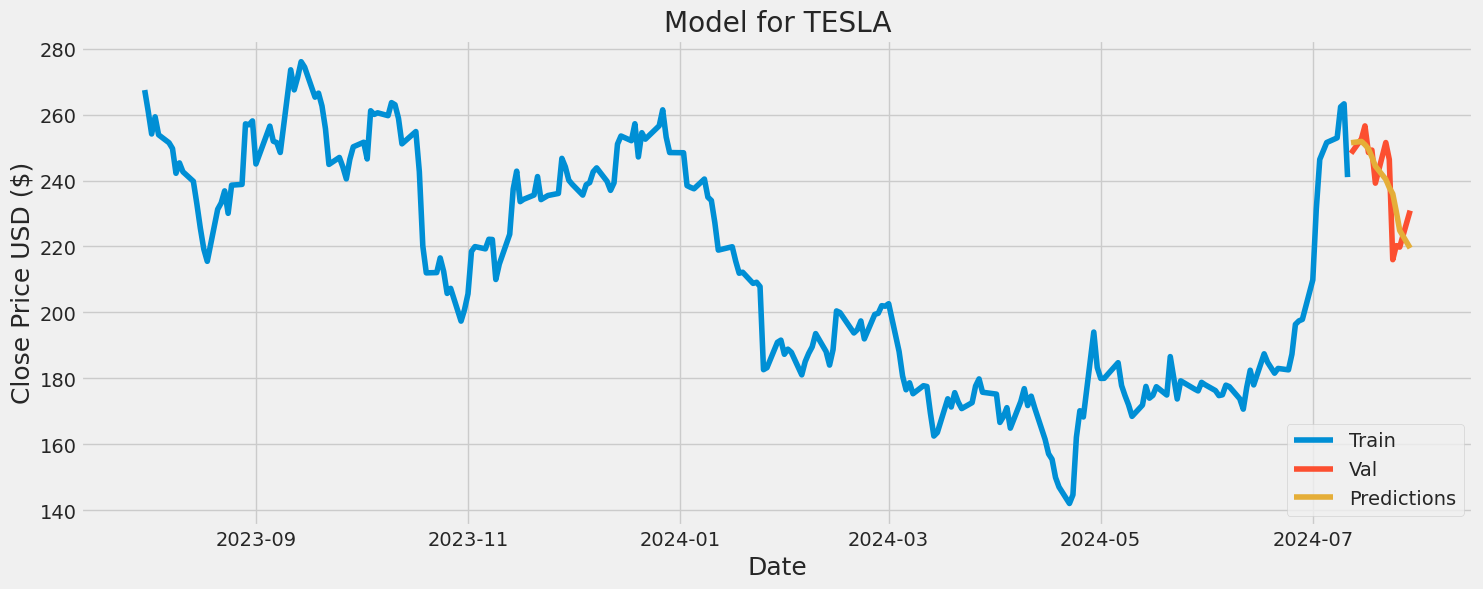

In [80]:
# Plot the data
train2 = close_TESLA[:training_dataTSLA_len]
valid2 = close_TESLA[training_dataTSLA_len:]
valid2['Predictions'] = predictions2

# Visualize the data
plt.figure(figsize=(16, 6))
plt.title('Model for TESLA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train2['Close'])
plt.plot(valid2[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [81]:
# Show the valid and predicted prices
print(valid)
print("--------------------------------------")
print(valid1)
print("--------------------------------------")
print(valid2)

                 Close  Predictions
Date                               
2024-07-12  230.539993   254.894836
2024-07-15  234.399994   257.696442
2024-07-16  234.820007   260.579712
2024-07-17  228.880005   263.284515
2024-07-18  224.179993   264.757050
2024-07-19  224.309998   264.666473
2024-07-22  223.960007   263.613556
2024-07-23  225.009995   261.926483
2024-07-24  218.539993   260.084625
2024-07-25  217.490005   257.291199
2024-07-26  217.960007   254.000565
2024-07-29  218.240005   250.694153
--------------------------------------
                 Close  Predictions
Date                               
2024-07-12  182.830002   230.230103
2024-07-15  182.880005   231.870178
2024-07-16  185.809998   233.768951
2024-07-17  187.449997   236.170670
2024-07-18  185.220001   238.955658
2024-07-19  183.250000   241.392761
2024-07-22  184.149994   243.107407
2024-07-23  184.100006   244.375122
2024-07-24  184.020004   245.217407
2024-07-25  191.979996   245.688370
2024-07-26  191.750000   